In [1]:
#Task 1:  (5 marks)
#Import Libraries
import kagglehub
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import metrics
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE

In [2]:
!pip install kagglehub

In [3]:
# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:32<00:00, 76.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [4]:
img_dir = os.path.join(path, 'chest_xray')
test_img_dir = os.path.join(img_dir, "test")
train_img_dir = os.path.join(img_dir, "train")
val_img_dir = os.path.join(img_dir, "val")

In [5]:
# Load the images
IMG_WIDTH, IMG_HEIGHT = 150, 150

def load_images_from_directory(directory):
    images = []
    labels = []
    for label in ['NORMAL', 'PNEUMONIA']:
        label_dir = os.path.join(directory, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
            img = img_to_array(img)  # Convert to array
            img = img / 255.0  # Normalize the image
            images.append(img)
            labels.append(0 if label == 'NORMAL' else 1)  # 0 = Normal, 1 = Pneumonia
    return np.array(images), np.array(labels)

In [6]:
#Separate the Input and Target Features of the images
#Split the data into Train and Test Sets
# Load train and test dataset
X_train, y_train = load_images_from_directory(train_img_dir)
X_test, y_test = load_images_from_directory(test_img_dir)

In [7]:
# Scaling data
# Flatten the images (from 3D to 2D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train)

In [8]:
# Batch size
batch_size = 100
epochs = 10

def create_batches(X, y, batch_size):
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        # Skip the batch if it contains only one class
        if len(np.unique(y_batch)) < 2:
            continue
        yield X_batch, y_batch

Epoch 1/10
Train Accuracy: 88.21%, Train F1-Score: 0.87
Test Accuracy: 75.96%, Test F1-Score: 0.81

Epoch 2/10
Train Accuracy: 90.70%, Train F1-Score: 0.90
Test Accuracy: 85.26%, Test F1-Score: 0.89

Epoch 3/10
Train Accuracy: 89.25%, Train F1-Score: 0.89
Test Accuracy: 77.40%, Test F1-Score: 0.82

Epoch 4/10
Train Accuracy: 89.63%, Train F1-Score: 0.90
Test Accuracy: 75.16%, Test F1-Score: 0.82

Epoch 5/10
Train Accuracy: 87.50%, Train F1-Score: 0.87
Test Accuracy: 76.60%, Test F1-Score: 0.82

Epoch 6/10
Train Accuracy: 89.43%, Train F1-Score: 0.89
Test Accuracy: 77.24%, Test F1-Score: 0.82

Epoch 7/10
Train Accuracy: 89.68%, Train F1-Score: 0.90
Test Accuracy: 74.84%, Test F1-Score: 0.82

Epoch 8/10
Train Accuracy: 89.90%, Train F1-Score: 0.90
Test Accuracy: 79.65%, Test F1-Score: 0.85

Epoch 9/10
Train Accuracy: 88.26%, Train F1-Score: 0.88
Test Accuracy: 72.92%, Test F1-Score: 0.80

Epoch 10/10
Train Accuracy: 88.04%, Train F1-Score: 0.87
Test Accuracy: 79.17%, Test F1-Score: 0.82


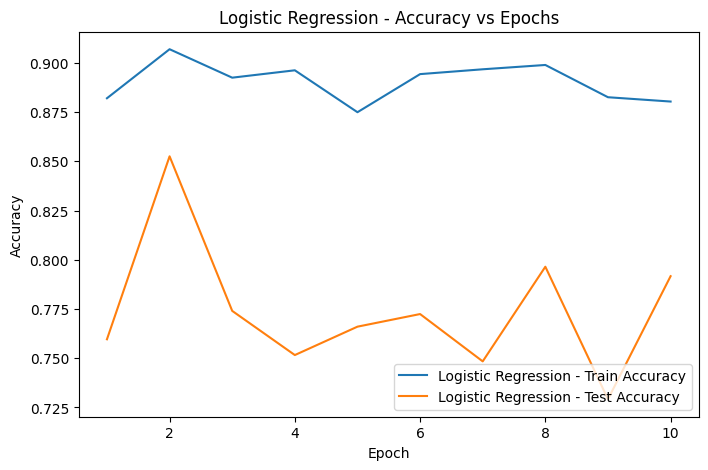

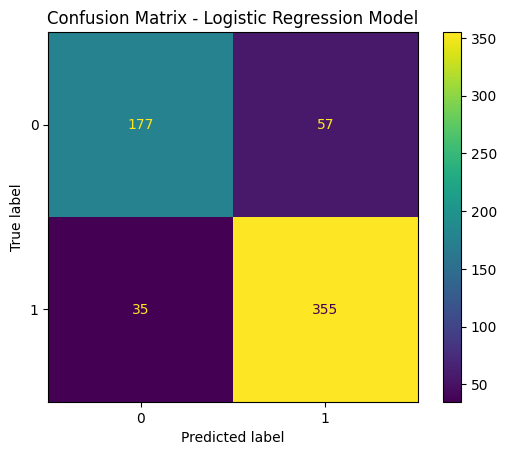

F1 score for Logistic Regression:0.885286783042394


In [39]:
#Task 2:  (5 marks)
#Train and compare three Machine Learning/Deep Learning Models
# Model 1 : Logistic Regression
train_accuracies_lr = []
test_accuracies_lr = []
train_f1_scores_lr = []
test_f1_scores_lr = []
test_f1_score_lr = 0
train_f1_score_lr = 0
test_pred_lr = []

lr = LogisticRegression(max_iter=1000)

for epoch in range(10):

    # Shuffle data at the start of each epoch
    X_train_flat, y_train = shuffle(X_train_resampled, y_train_resampled)

    for X_batch, y_batch in create_batches(X_train_flat, y_train, batch_size):
        lr.fit(X_batch, y_batch)

    # Evaluate on train data
    y_train_pred = lr.predict(X_train_flat)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Evaluate on test data
    y_test_pred = lr.predict(X_test_flat)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Append metrics for plotting
    train_accuracies_lr.append(train_accuracy)
    test_accuracies_lr.append(test_accuracy)
    train_f1_scores_lr.append(train_f1)
    test_f1_scores_lr.append(test_f1)

    print(f"Epoch {epoch + 1}/10")
    print(f"Train Accuracy: {train_accuracy * 100:.2f}%, Train F1-Score: {train_f1:.2f}")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%, Test F1-Score: {test_f1:.2f}\n")

    if test_f1 > test_f1_score_lr:
      test_f1_score_lr = test_f1
      test_precision_lr = precision_score(y_test, y_test_pred)
      test_recall_lr = recall_score(y_test, y_test_pred)
      test_pred_lr = y_test_pred

    if train_f1 > train_f1_score_lr:
      train_f1_score_lr = train_f1
      train_precision_lr = precision_score(y_train, y_train_pred)
      train_recall_lr = recall_score(y_train, y_train_pred)

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_accuracies_lr, label='Logistic Regression - Train Accuracy')
plt.plot(range(1, 11), test_accuracies_lr, label='Logistic Regression - Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Logistic Regression - Accuracy vs Epochs')
plt.legend(loc='lower right')
plt.show()

# Plot Matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

print("F1 score for Logistic Regression:" + str(test_f1_score_lr))

Epoch 1/10
Train Accuracy: 88.89%, Train F1-Score: 0.89
Test Accuracy: 81.89%, Test F1-Score: 0.87

Epoch 2/10
Train Accuracy: 86.44%, Train F1-Score: 0.86
Test Accuracy: 71.63%, Test F1-Score: 0.77

Epoch 3/10
Train Accuracy: 75.11%, Train F1-Score: 0.68
Test Accuracy: 61.06%, Test F1-Score: 0.61

Epoch 4/10
Train Accuracy: 89.68%, Train F1-Score: 0.90
Test Accuracy: 75.00%, Test F1-Score: 0.82

Epoch 5/10
Train Accuracy: 86.35%, Train F1-Score: 0.87
Test Accuracy: 78.21%, Test F1-Score: 0.84

Epoch 6/10
Train Accuracy: 84.99%, Train F1-Score: 0.83
Test Accuracy: 70.99%, Test F1-Score: 0.76

Epoch 7/10
Train Accuracy: 89.48%, Train F1-Score: 0.90
Test Accuracy: 82.37%, Test F1-Score: 0.86

Epoch 8/10
Train Accuracy: 83.21%, Train F1-Score: 0.85
Test Accuracy: 74.84%, Test F1-Score: 0.83

Epoch 10/10
Train Accuracy: 89.20%, Train F1-Score: 0.90
Test Accuracy: 79.01%, Test F1-Score: 0.85



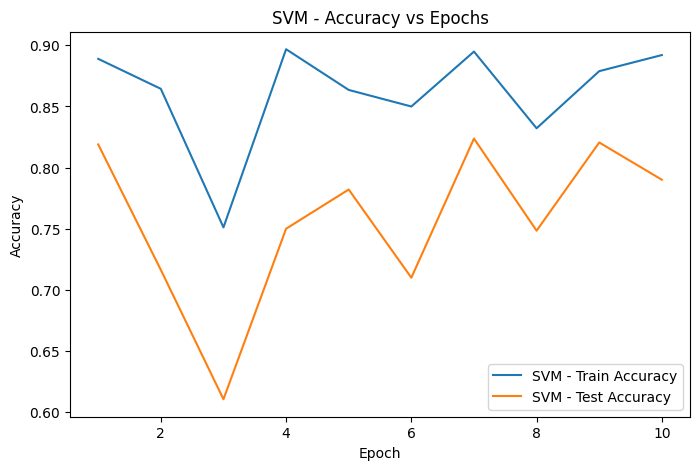

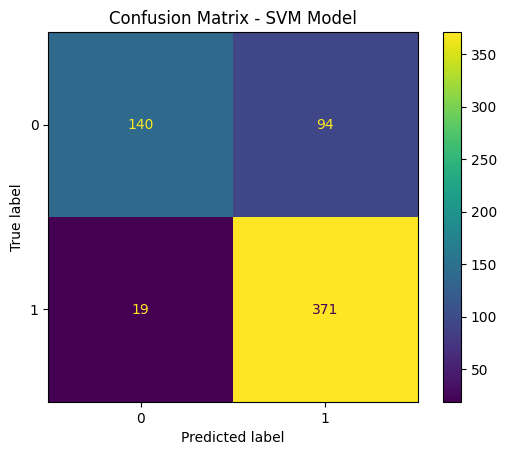

F1 score for SVM: 0.8678362573099415


In [42]:
# Model 2 : SVM
train_accuracies_svm = []
test_accuracies_svm = []
train_f1_scores_svm = []
test_f1_scores_svm = []
test_f1_score_svm = 0
train_f1_score_svm = 0
test_pred_svm = []
svm = SVC()

for epoch in range(10):

  X_train_flat, y_train = shuffle(X_train_resampled, y_train_resampled)

  # Train model
  for X_batch, y_batch in create_batches(X_train_flat, y_train, batch_size):
      svm.fit(X_batch, y_batch)

  # Evaluate on train data
  y_train_pred = svm.predict(X_train_flat)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_f1 = f1_score(y_train, y_train_pred)

  # Evaluate on test data
  y_test_pred = svm.predict(X_test_flat)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_f1 = f1_score(y_test, y_test_pred)

  # Append metrics for plotting
  train_accuracies_svm.append(train_accuracy)
  test_accuracies_svm.append(test_accuracy)
  train_f1_scores_svm.append(train_f1)
  test_f1_scores_svm.append(test_f1)

  print(f"Epoch {epoch + 1}/10")
  print(f"Train Accuracy: {train_accuracy * 100:.2f}%, Train F1-Score: {train_f1:.2f}")
  print(f"Test Accuracy: {test_accuracy * 100:.2f}%, Test F1-Score: {test_f1:.2f}\n")

  if test_f1 > test_f1_score_svm:
    test_f1_score_svm = test_f1
    test_precision_svm = precision_score(y_test, y_test_pred)
    test_recall_svm = recall_score(y_test, y_test_pred)
    test_pred_svm = y_test_pred

  if train_f1 > train_f1_score_svm:
    train_f1_score_svm = train_f1
    train_precision_svm = precision_score(y_train, y_train_pred)
    train_recall_svm = recall_score(y_train, y_train_pred)

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_accuracies_svm, label='SVM - Train Accuracy')
plt.plot(range(1, 11), test_accuracies_svm, label='SVM - Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('SVM - Accuracy vs Epochs')
plt.legend(loc='lower right')
plt.show()

# Plot Matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Confusion Matrix - SVM Model')
plt.show()

print("F1 score for SVM: " +  str(test_f1_score_svm))

Epoch 1/10
Train Accuracy: 89.20%, Train F1-Score: 0.76
Test Accuracy: 79.01%, Test F1-Score: 0.75

Epoch 2/10
Train Accuracy: 89.20%, Train F1-Score: 0.76
Test Accuracy: 79.01%, Test F1-Score: 0.78

Epoch 3/10
Train Accuracy: 89.20%, Train F1-Score: 0.75
Test Accuracy: 79.01%, Test F1-Score: 0.77

Epoch 4/10
Train Accuracy: 89.20%, Train F1-Score: 0.78
Test Accuracy: 79.01%, Test F1-Score: 0.78

Epoch 5/10
Train Accuracy: 89.20%, Train F1-Score: 0.68
Test Accuracy: 79.01%, Test F1-Score: 0.74

Epoch 6/10
Train Accuracy: 89.20%, Train F1-Score: 0.74
Test Accuracy: 79.01%, Test F1-Score: 0.67

Epoch 7/10
Train Accuracy: 89.20%, Train F1-Score: 0.76
Test Accuracy: 79.01%, Test F1-Score: 0.73

Epoch 8/10
Train Accuracy: 89.20%, Train F1-Score: 0.63
Test Accuracy: 79.01%, Test F1-Score: 0.61

Epoch 9/10
Train Accuracy: 89.20%, Train F1-Score: 0.71
Test Accuracy: 79.01%, Test F1-Score: 0.66

Epoch 10/10
Train Accuracy: 89.20%, Train F1-Score: 0.77
Test Accuracy: 79.01%, Test F1-Score: 0.74


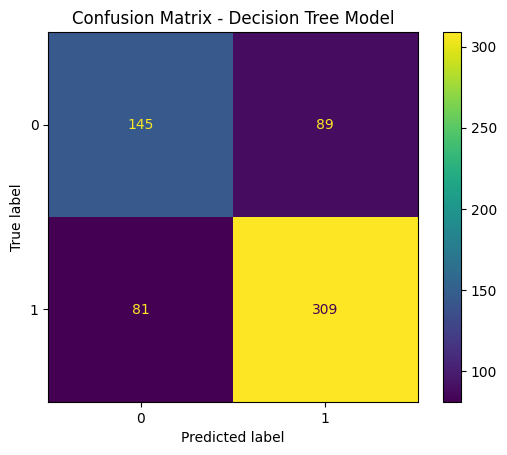

F1 score for Decision Tree: 0.7842639593908629


In [44]:
# Model 3 : Decision Tree
train_accuracies_dt = []
test_accuracies_dt = []
train_f1_scores_dt = []
test_f1_scores_dt = []
test_f1_score_dt = 0
train_f1_score_dt = 0
test_pred_dt=[]

dt = DecisionTreeClassifier()

for epoch in range(10):

  X_train_flat, y_train = shuffle(X_train_resampled, y_train_resampled)

  # Train the model
  for X_batch, y_batch in create_batches(X_train_flat, y_train, batch_size):
      dt.fit(X_batch, y_batch)

  # Evaluate on train data
  y_train_pred = dt.predict(X_train_flat)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_f1 = f1_score(y_train, y_train_pred)

  # Evaluate on test data
  y_test_pred = dt.predict(X_test_flat)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_f1 = f1_score(y_test, y_test_pred)

  # Append metrics for plotting
  train_accuracies_dt.append(train_accuracy)
  test_accuracies_dt.append(test_accuracy)
  train_f1_scores_dt.append(train_f1)
  test_f1_scores_dt.append(test_f1)

  print(f"Epoch {epoch + 1}/10")
  print(f"Train Accuracy: {train_accuracy * 100:.2f}%, Train F1-Score: {train_f1:.2f}")
  print(f"Test Accuracy: {test_accuracy * 100:.2f}%, Test F1-Score: {test_f1:.2f}\n")

  if test_f1 > test_f1_score_dt:
    test_f1_score_dt = test_f1
    test_precision_dt = precision_score(y_test, y_test_pred)
    test_recall_dt = recall_score(y_test, y_test_pred)
    test_pred_dt = y_test_pred

  if train_f1 > train_f1_score_dt:
    train_f1_score_dt = train_f1
    train_precision_dt = precision_score(y_train, y_train_pred)
    train_recall_dt = recall_score(y_train, y_train_pred)

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_accuracies_dt, label='Decision Tree - Train Accuracy')
plt.plot(range(1, 11), test_accuracies_dt, label='Decision Tree - Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Decision Tree - Accuracy vs Epochs')
plt.legend(loc='lower right')
plt.show()

# Plot Matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

print("F1 score for Decision Tree: " +  str(test_f1_score_dt))

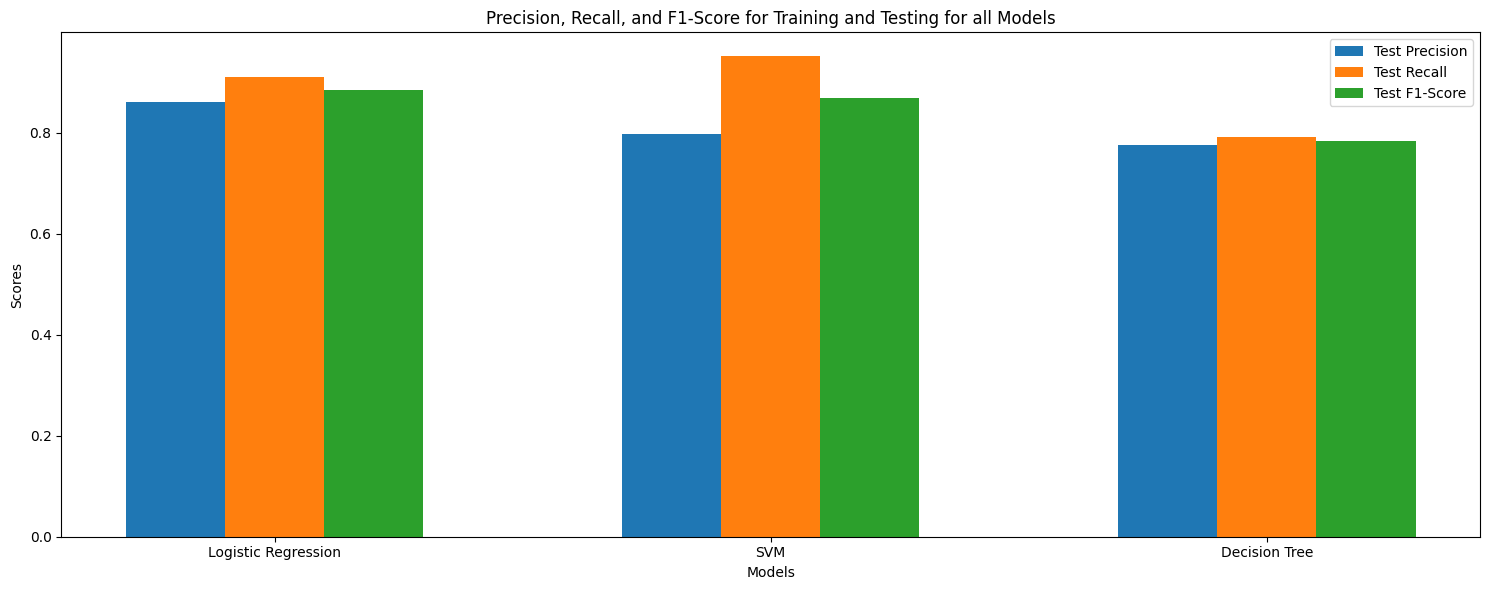

In [45]:
final_metrics = {
    'F1-Score': {'train': [train_f1_score_lr, train_f1_score_svm, train_f1_score_dt], 'test': [test_f1_score_lr, test_f1_score_svm, test_f1_score_dt]},
    'Precision': {'train': [train_precision_lr, train_precision_svm, train_precision_dt], 'test': [test_precision_lr, test_precision_svm, test_precision_dt]},
    'Recall': {'train': [train_recall_lr, train_recall_svm, train_recall_dt], 'test': [test_recall_lr, test_recall_svm, test_recall_dt]}
}
labels = ['Logistic Regression', 'SVM', 'Decision Tree']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(15, 6))

bar_width = 0.2

# Plot Precision
#ax.bar(x - bar_width, final_metrics['Precision']['train'], bar_width, label='Train Precision')
ax.bar(x + bar_width, final_metrics['Precision']['test'], bar_width, label='Test Precision')

# Plot Recall
#ax.bar(x + bar_width, final_metrics['Recall']['train'], bar_width, label='Train Recall')
ax.bar(x + 2*bar_width, final_metrics['Recall']['test'], bar_width, label='Test Recall')

# Plot F1-Score
#ax.bar(x + 3*bar_width, final_metrics['F1-Score']['train'], bar_width, label='Train F1-Score')
ax.bar(x + 3*bar_width, final_metrics['F1-Score']['test'], bar_width, label='Test F1-Score')

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Training and Testing for all Models')
ax.set_xticks(x + 2*bar_width)  # Place the x-ticks in the middle of each group
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

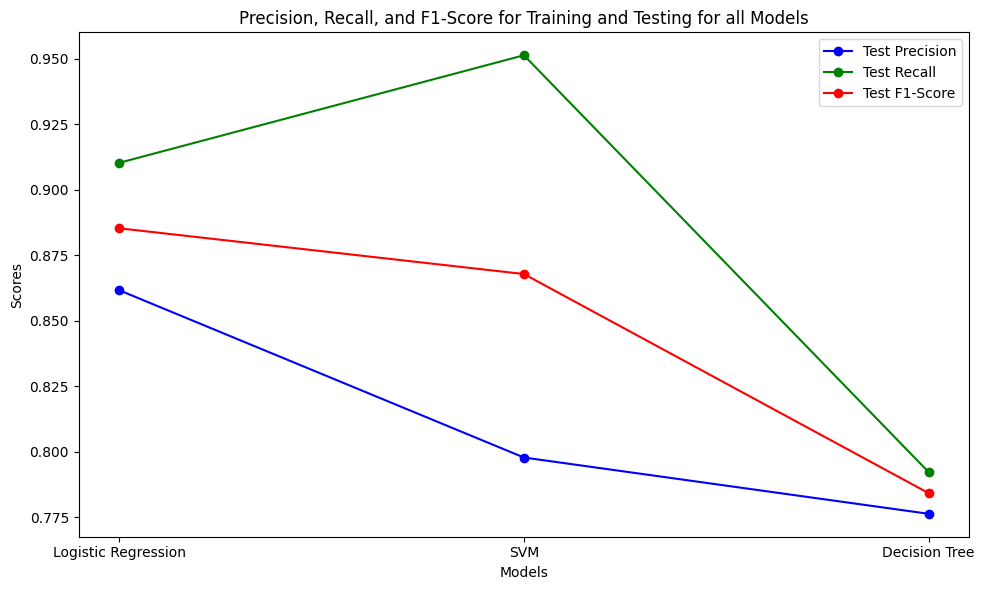

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Precision, Recall, and F1-Score as lines
ax.plot(x, final_metrics['Precision']['test'], label='Test Precision', marker='o', linestyle='-', color='b')
ax.plot(x, final_metrics['Recall']['test'], label='Test Recall', marker='o', linestyle='-', color='g')
ax.plot(x, final_metrics['F1-Score']['test'], label='Test F1-Score', marker='o', linestyle='-', color='r')

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Training and Testing for all Models')
ax.set_xticks(x)  # Set x-ticks in the middle of each model
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
print("Logistic Regression Model")
print("Precision Score: " + str(test_precision_lr))
print("Recall Score: " + str(test_recall_lr))
print("F1 Score: " + str(test_f1_score_lr))
print("\n")
print("SVM Model")
print("Precision Score: " + str(test_precision_svm))
print("Recall Score: " + str(test_recall_svm))
print("F1 Score: " + str(test_f1_score_svm))
print("\n")
print("Decision Tree Model")
print("Precision Score: " + str(test_precision_dt))
print("Recall Score: " + str(test_recall_dt))
print("F1 Score: " + str(test_f1_score_dt))

Logistic Regression Model
Precision Score: 0.8616504854368932
Recall Score: 0.9102564102564102
F1 Score: 0.885286783042394


SVM Model
Precision Score: 0.7978494623655914
Recall Score: 0.9512820512820512
F1 Score: 0.8678362573099415


Decision Tree Model
Precision Score: 0.7763819095477387
Recall Score: 0.7923076923076923
F1 Score: 0.7842639593908629
